In [11]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/Users/xinyue/Desktop/Project 2/Other Regional.csv'
df = pd.read_csv(file_path)
print(df)

                Unnamed: 0                Unnamed: 1 Mar 2010 Unnamed: 83  \
0   Other Regional Centres                Bairnsdale      442     $220.00   
1                      NaN                   Benalla      403     $200.00   
2                      NaN               Castlemaine      288     $225.00   
3                      NaN                    Echuca      539     $220.00   
4                      NaN                  Hamilton      348     $200.00   
5                      NaN                   Horsham      675     $185.00   
6                      NaN                   Mildura    1,486     $200.00   
7                      NaN            Moe-Newborough      514     $150.00   
8                      NaN                   Morwell      656     $155.00   
9                      NaN  Ocean Grove-Barwon Heads      497     $300.00   
10                     NaN                  Portland      408     $200.00   
11                     NaN               Sale-Maffra      791     $220.00   

In [12]:
# Create a new header row with 'Count' and 'Median' labels starting from the third column
new_header = ['Area', 'Suburb']  # Start with 'Area' and 'Suburb' for the first two columns

# Use a loop to dynamically generate 'Count.1', 'Median.1', 'Count.2', 'Median.2', etc.
count_num = 1  # Initialize count number
median_num = 1  # Initialize median number

# Start from the third column
for i in range(2, len(df.columns)):
    if (i - 2) % 4 == 0:  # Every 4th column should be 'Count'
        new_header.append(f'Count.{count_num}')
        count_num += 1
    elif (i - 2) % 4 == 1:  # Every 2nd column after 'Count' should be 'Median'
        new_header.append(f'Median.{median_num}')
        median_num += 1
    elif (i - 2) % 4 == 2:  # Every 2nd column should be 'Count'
        new_header.append(f'Count.{count_num}')
        count_num += 1
    else:  # Remaining columns are 'Median'
        new_header.append(f'Median.{median_num}')
        median_num += 1

# Assign the new header row to the DataFrame columns
df.columns = new_header

In [13]:
# Filter out the columns that contain 'Median' in their name to get the median rental prices
median_columns = [col for col in df.columns if 'Median' in col]

# Extract only the 'Median' columns along with the 'Suburb' column
median_data = df[['Suburb'] + median_columns].copy()

In [14]:
# Convert each median rental price column to numeric, removing non-numeric characters
for col in median_data.columns:
    if 'Median' in col:
        # Remove any dollar signs or non-numeric characters and convert to numeric
        median_data[col] = pd.to_numeric(median_data[col].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')
print(median_data)

                      Suburb  Median.1  Median.2  Median.3  Median.4  \
0                 Bairnsdale     220.0     220.0     230.0     240.0   
1                    Benalla     200.0     200.0     200.0     200.0   
2                Castlemaine     225.0     235.0     240.0     250.0   
3                     Echuca     220.0     225.0     230.0     230.0   
4                   Hamilton     200.0     200.0     210.0     210.0   
5                    Horsham     185.0     190.0     190.0     195.0   
6                    Mildura     200.0     200.0     205.0     205.0   
7             Moe-Newborough     150.0     160.0     160.0     165.0   
8                    Morwell     155.0     160.0     160.0     165.0   
9   Ocean Grove-Barwon Heads     300.0     300.0     300.0     310.0   
10                  Portland     200.0     200.0     200.0     203.0   
11               Sale-Maffra     220.0     220.0     220.0     220.0   
12                   Seymour     170.0     180.0     180.0     1

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
/var/folders/_s/4j24gf8n0ls5dt1yjm000kbr0000gn/T/ipykernel_72673/4014745995.py:5: SyntaxWarning: invalid escape sequence '\$'
  median_data[col] = pd.to_numeric(median_data[col].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')


In [15]:
# Round the 'Median' columns to the nearest integer and convert to integer type
for col in median_columns:
    median_data[col] = median_data[col].round().astype('Int64')  # Use 'Int64' to allow for NaN values

# Print the converted data to ensure that all columns have been properly converted
print("Median Data after conversion to integers:")
print(median_data.head())

Median Data after conversion to integers:
        Suburb  Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  \
0   Bairnsdale       220       220       230       240       240       245   
1      Benalla       200       200       200       200       200       200   
2  Castlemaine       225       235       240       250       260       260   
3       Echuca       220       225       230       230       230       230   
4     Hamilton       200       200       210       210       200       213   

   Median.7  Median.8  Median.9  ...  Median.32  Median.33  Median.34  \
0       250       250       250  ...        280        290        290   
1       205       210       210  ...        250        250        250   
2       270       280       280  ...        320        320        325   
3       230       240       240  ...        290        300        300   
4       220       230       230  ...        235        240        240   

   Median.35  Median.36  Median.37  Median.38  Med

Growth trend for Bairnsdale:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
0      <NA>       0.0  4.545455  4.347826       0.0  2.083333  2.040816   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
0       0.0       0.0        1.2  ...   3.571429        0.0        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
0   1.034483   2.389078        0.0        0.0        0.0  33.333333   

   Average Growth Rate (%)  
0                 1.620623  

[1 rows x 42 columns]


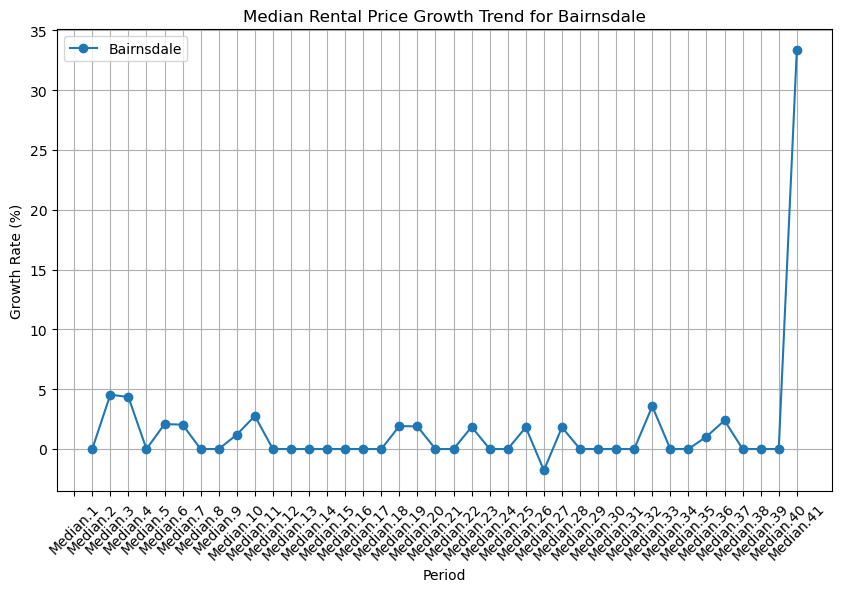

Growth trend for Benalla:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
1      <NA>       0.0       0.0       0.0       0.0       0.0       2.5   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
1  2.439024       0.0   2.380952  ...        0.0        0.0        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
1        4.0   3.846154   3.703704   7.142857        0.0  31.666667   

   Average Growth Rate (%)  
1                 1.828887  

[1 rows x 42 columns]


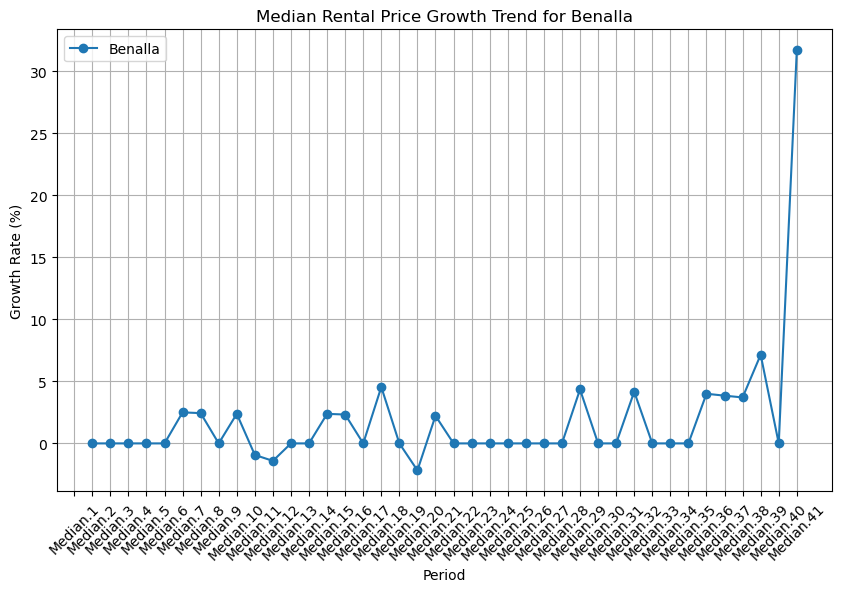

Growth trend for Castlemaine:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
2      <NA>  4.444444   2.12766  4.166667       4.0       0.0  3.846154   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
2  3.703704       0.0        0.0  ...        0.0     1.5625   1.538462   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
2        0.0        0.0        0.0        0.0   3.030303  26.470588   

   Average Growth Rate (%)  
2                 1.715103  

[1 rows x 42 columns]


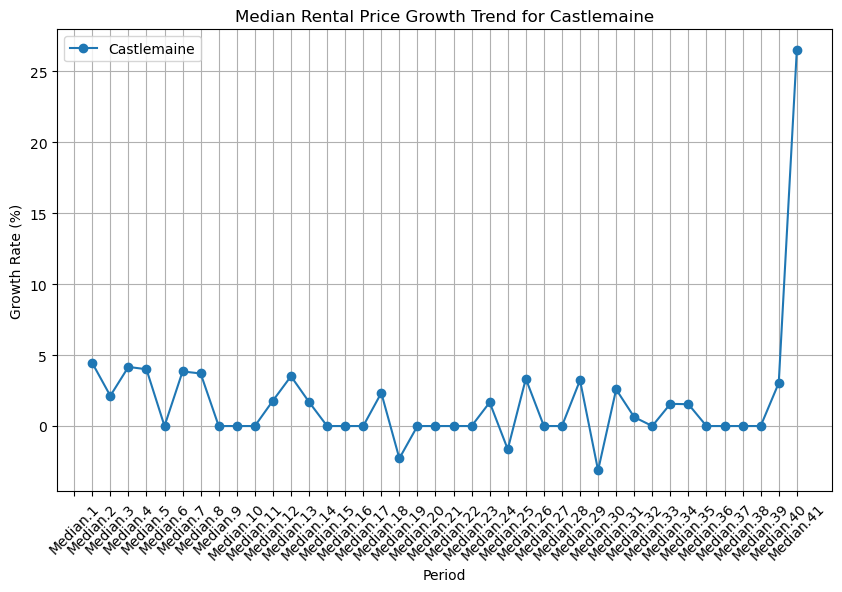

Growth trend for Echuca:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
3      <NA>  2.272727  2.222222       0.0       0.0       0.0       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
3  4.347826       0.0   4.166667  ...   3.448276        0.0   3.333333   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
3  -3.225806   3.333333   1.612903   1.587302     1.5625  26.153846   

   Average Growth Rate (%)  
3                 1.648072  

[1 rows x 42 columns]


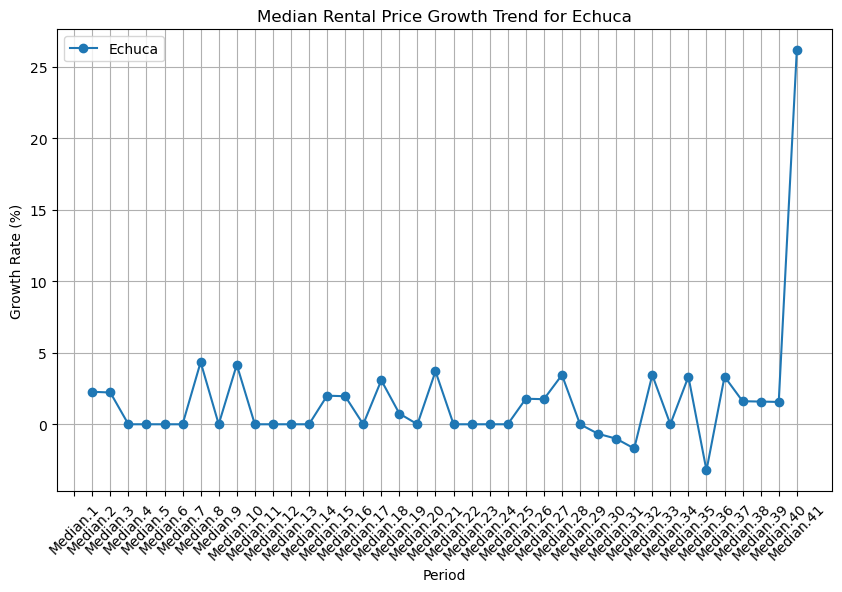

Growth trend for Hamilton:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
4      <NA>       0.0       5.0       0.0 -4.761905       6.5  3.286385   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
4  4.545455       0.0        0.0  ...    2.12766        0.0        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
4        0.0   4.166667        4.0   1.153846   1.901141  23.134328   

   Average Growth Rate (%)  
4                  1.33484  

[1 rows x 42 columns]


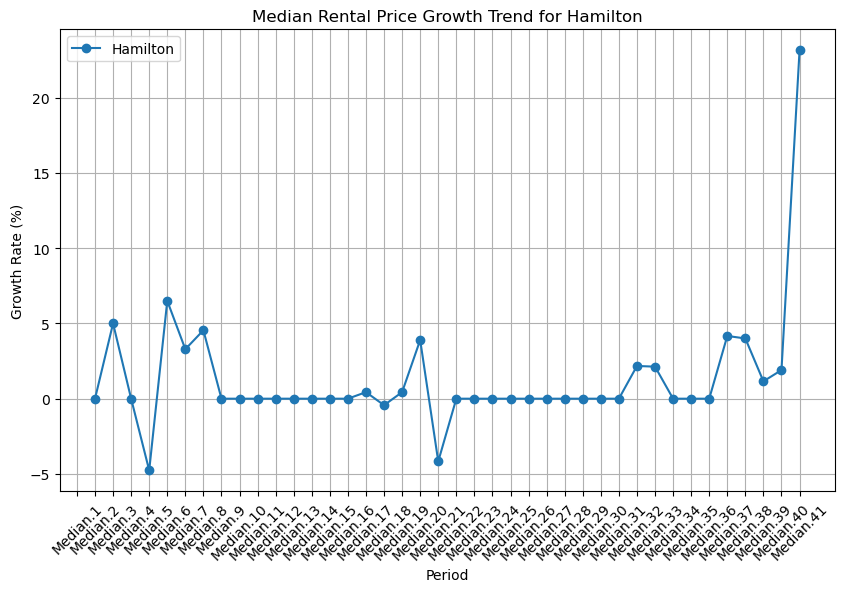

Growth trend for Horsham:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
5      <NA>  2.702703       0.0  2.631579       0.0  2.564103       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
5       5.0  4.761905  -2.272727  ...        0.0        0.0   3.846154   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
5  -1.851852   1.886792   1.111111   0.732601        0.0  27.272727   

   Average Growth Rate (%)  
5                 1.690866  

[1 rows x 42 columns]


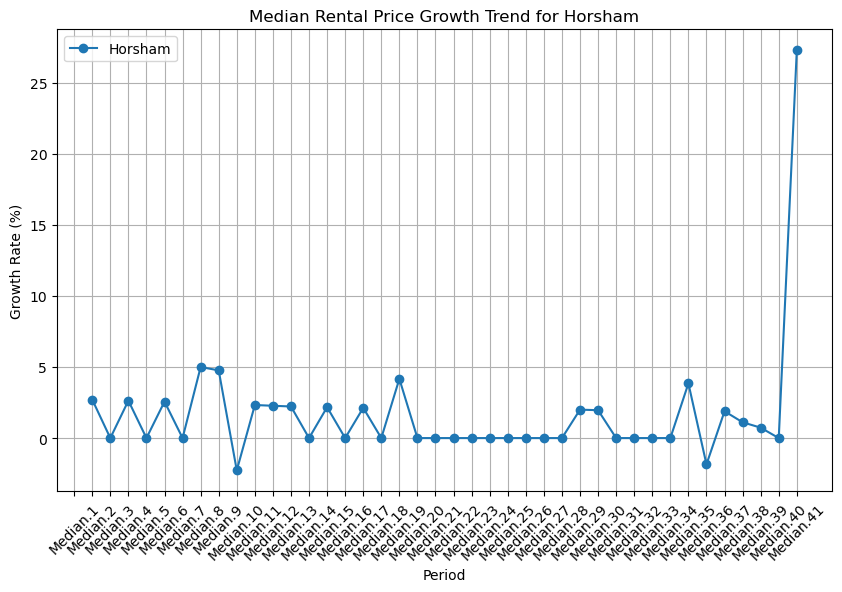

Growth trend for Mildura:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
6      <NA>       0.0       2.5       0.0  2.439024       0.0  4.761905   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
6       0.0       0.0   3.636364  ...        0.0        0.0   1.071429   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
6   2.473498   1.724138   1.694915        0.0   3.333333  16.129032   

   Average Growth Rate (%)  
6                 1.513661  

[1 rows x 42 columns]


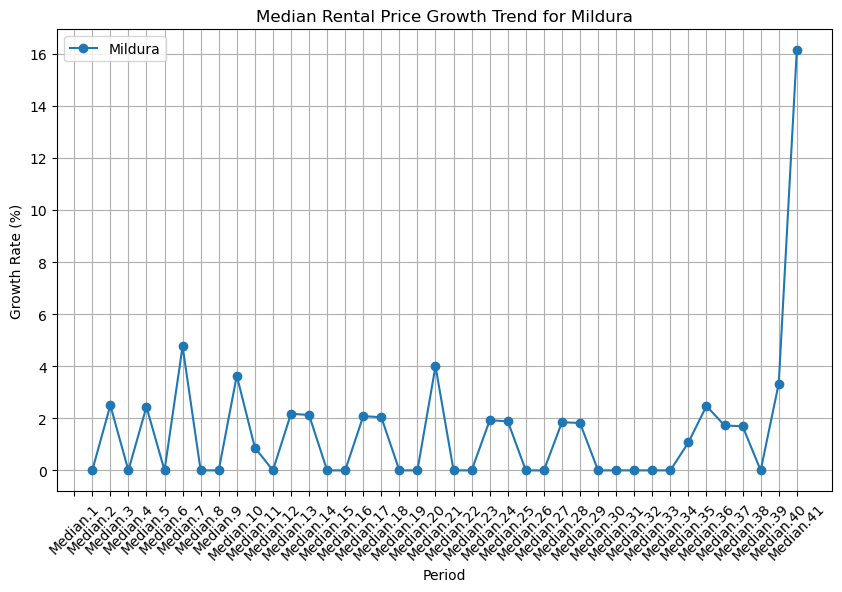

Growth trend for Moe-Newborough:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
7      <NA>  6.666667       0.0     3.125  3.030303  5.882353       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
7       0.0       0.0  -2.777778  ...  -0.952381   0.961538        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
7   2.380952   2.325581   2.272727   2.222222        0.0  39.130435   

   Average Growth Rate (%)  
7                  2.07778  

[1 rows x 42 columns]


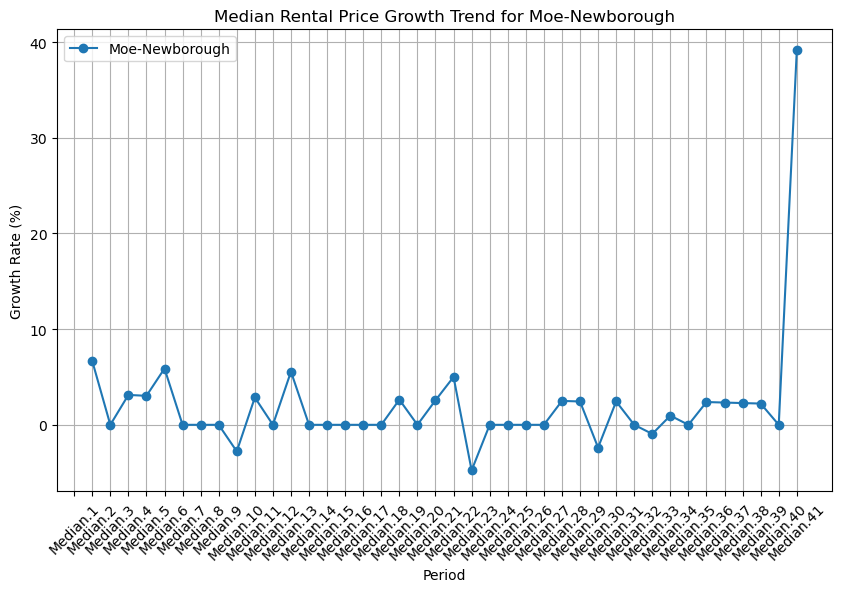

Growth trend for Morwell:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
8      <NA>  3.225806       0.0     3.125       0.0  3.030303  1.176471   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
8  1.744186       0.0        0.0  ...   1.941748        0.0        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
8        0.0   2.380952   2.325581   2.272727   2.222222  39.130435   

   Average Growth Rate (%)  
8                 1.978365  

[1 rows x 42 columns]


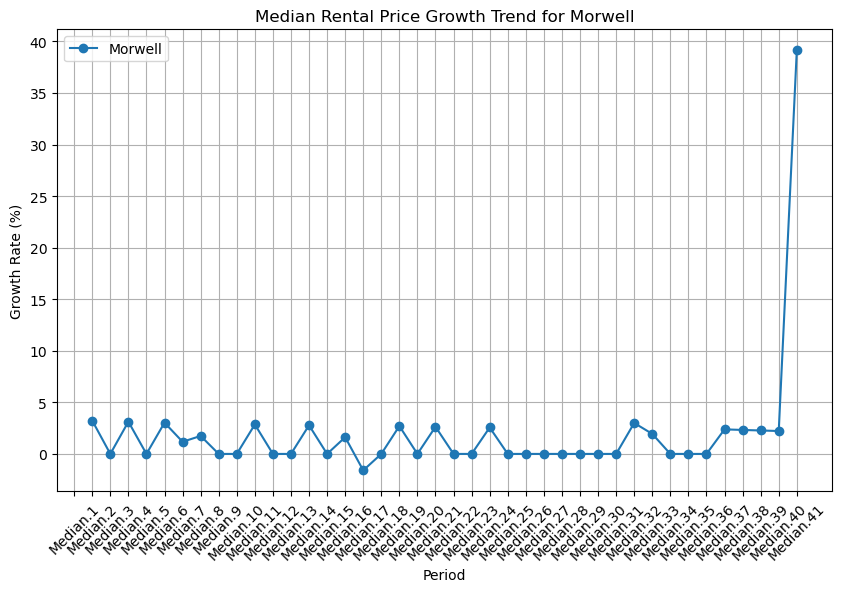

Growth trend for Ocean Grove-Barwon Heads:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
9      <NA>       0.0       0.0  3.333333  3.225806     3.125  1.515152   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
9  4.477612       0.0        0.0  ...   1.282051   1.265823        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
9        0.0       3.75   1.204819   1.190476   1.176471  27.906977   

   Average Growth Rate (%)  
9                 1.610568  

[1 rows x 42 columns]


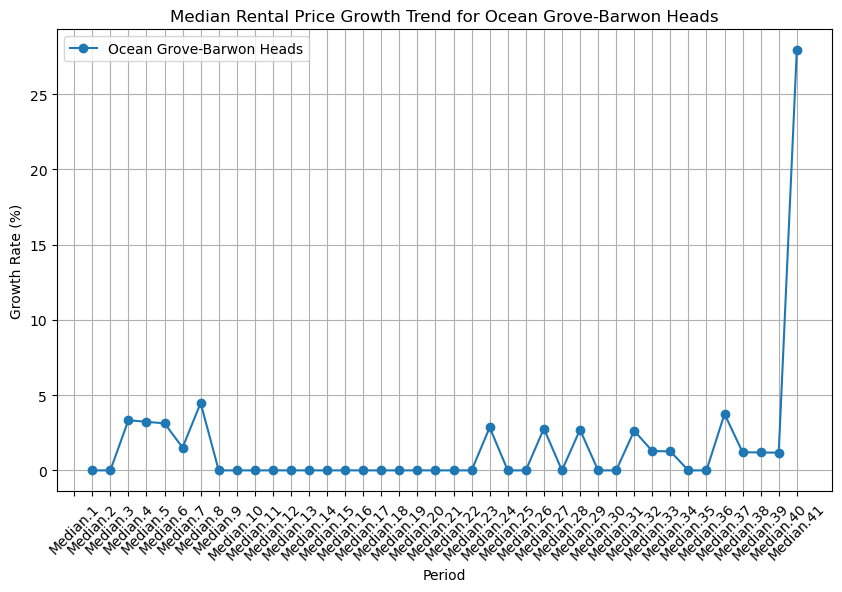

Growth trend for Portland:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
10      <NA>       0.0       0.0       1.5  3.448276       0.0       0.0   

    Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
10       0.0  4.761905   2.272727  ...        0.0   4.166667        0.0   

    Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
10        4.0        0.0   1.923077   1.886792   3.703704  35.714286   

    Average Growth Rate (%)  
10                 1.748687  

[1 rows x 42 columns]


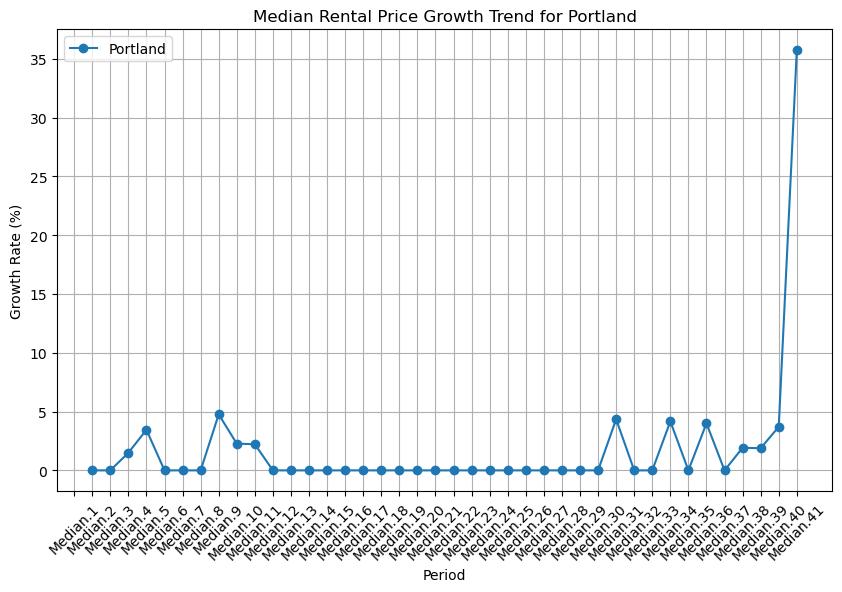

Growth trend for Sale-Maffra:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
11      <NA>       0.0       0.0       0.0  2.272727  2.222222       0.0   

    Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
11  2.173913   2.12766        0.0  ...   1.886792        0.0  -1.851852   

    Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
11   1.886792   1.851852   1.818182   1.785714   1.754386  37.931034   

    Average Growth Rate (%)  
11                 1.651708  

[1 rows x 42 columns]


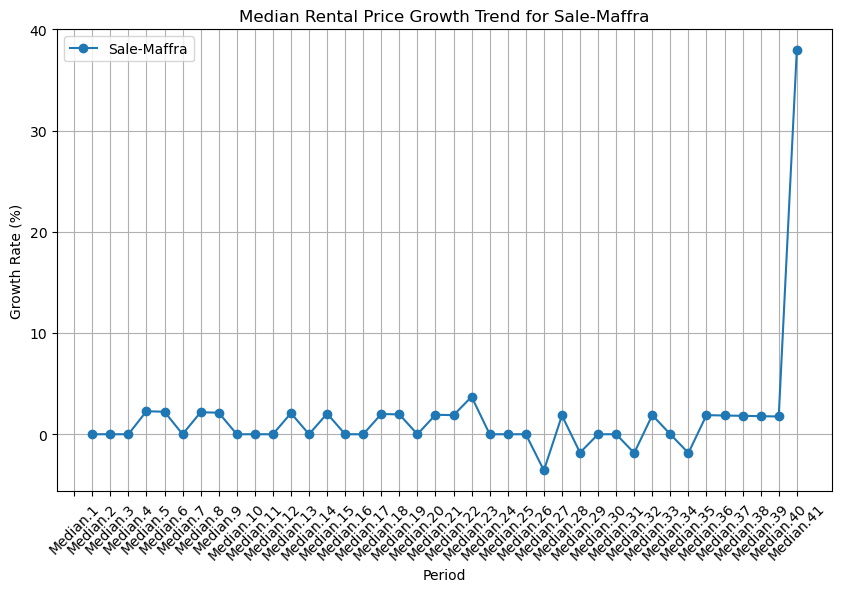

Growth trend for Seymour:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
12      <NA>  5.882353       0.0  2.777778  2.702703  5.263158       5.0   

    Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
12  1.428571  3.286385  -0.909091  ...   1.886792   1.851852  -1.818182   

    Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
12   2.962963   0.719424        0.0   3.571429        0.0  25.862069   

    Average Growth Rate (%)  
12                 2.025062  

[1 rows x 42 columns]


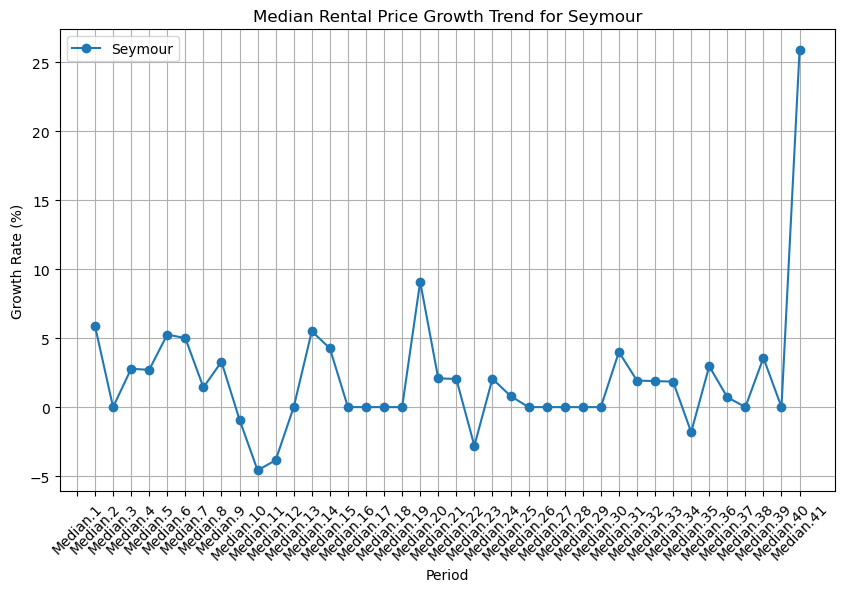

Growth trend for Shepparton:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
13      <NA>  4.761905  2.272727       0.0  2.222222       0.0       0.0   

    Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
13  4.347826       0.0   2.083333  ...   1.851852        0.0   1.818182   

    Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
13        0.0        0.0   1.785714        0.0   1.754386  31.034483   

    Average Growth Rate (%)  
13                 1.594583  

[1 rows x 42 columns]


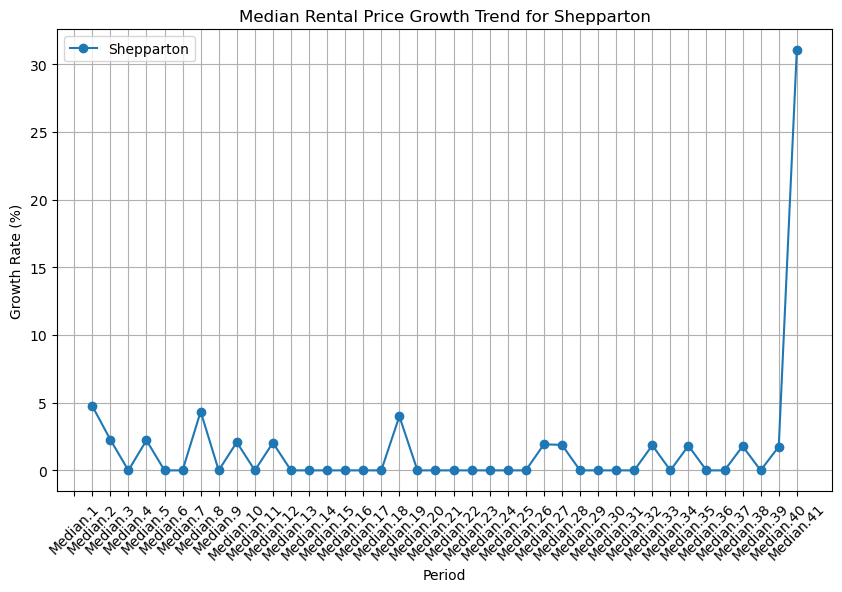

Growth trend for Swan Hill:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
14      <NA>       0.0       0.0       2.5  2.439024       0.0       0.0   

    Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
14       0.0       0.0   2.380952  ...        0.0   2.040816        0.0   

    Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
14        0.0        4.0        0.0        0.0        0.0  23.076923   

    Average Growth Rate (%)  
14                 1.243006  

[1 rows x 42 columns]


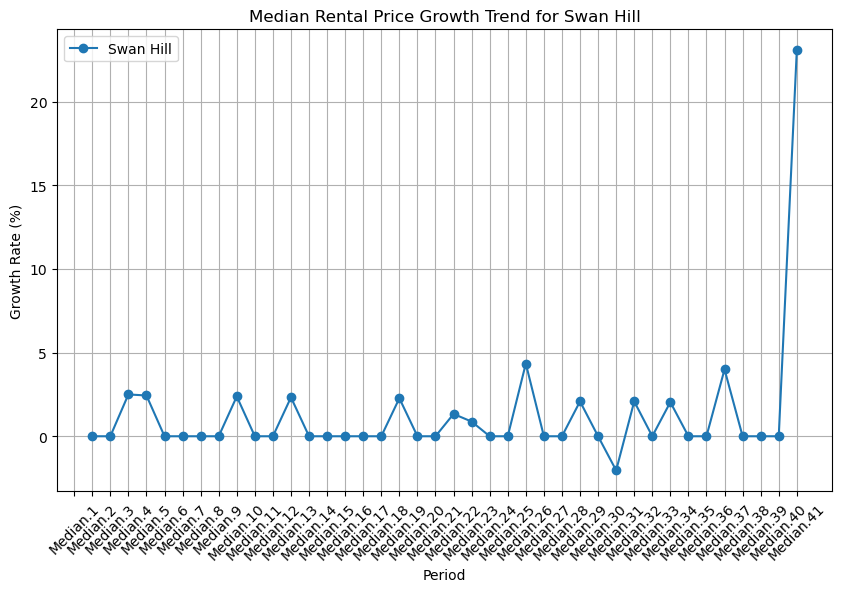

Growth trend for Torquay:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
15      <NA>       0.0  2.857143       0.0  5.555556  1.315789       0.0   

    Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
15  2.597403 -1.265823        0.0  ...    2.12766        0.0      3.125   

    Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
15        0.0   1.010101        0.0        0.0        0.0       24.0   

    Average Growth Rate (%)  
15                 1.505638  

[1 rows x 42 columns]


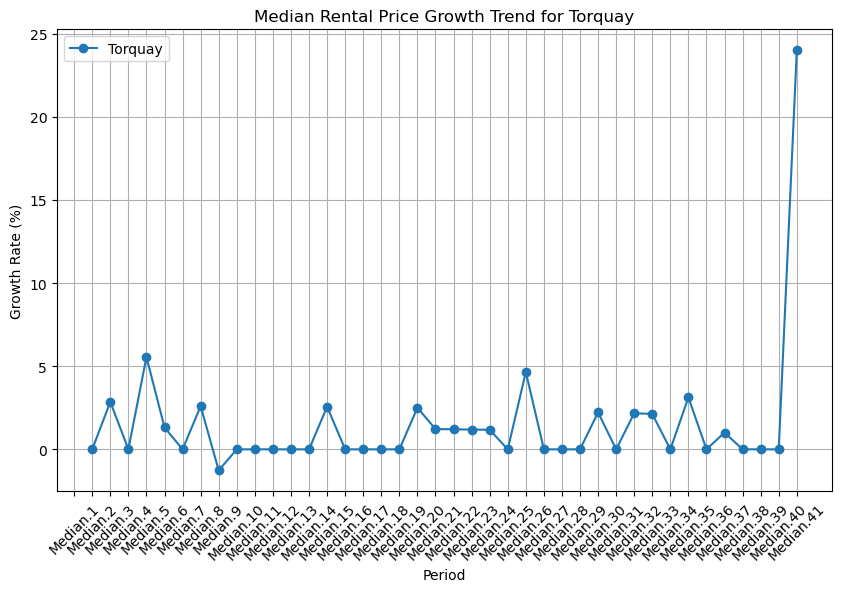

Growth trend for Traralgon:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
16      <NA>       0.0       0.0  2.173913  2.978723  3.305785       0.0   

    Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
16       0.0       0.0        0.0  ...        0.0  -1.785714   1.818182   

    Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
16        0.0        0.0   1.785714   1.754386   1.724138  30.508475   

    Average Growth Rate (%)  
16                 1.394568  

[1 rows x 42 columns]


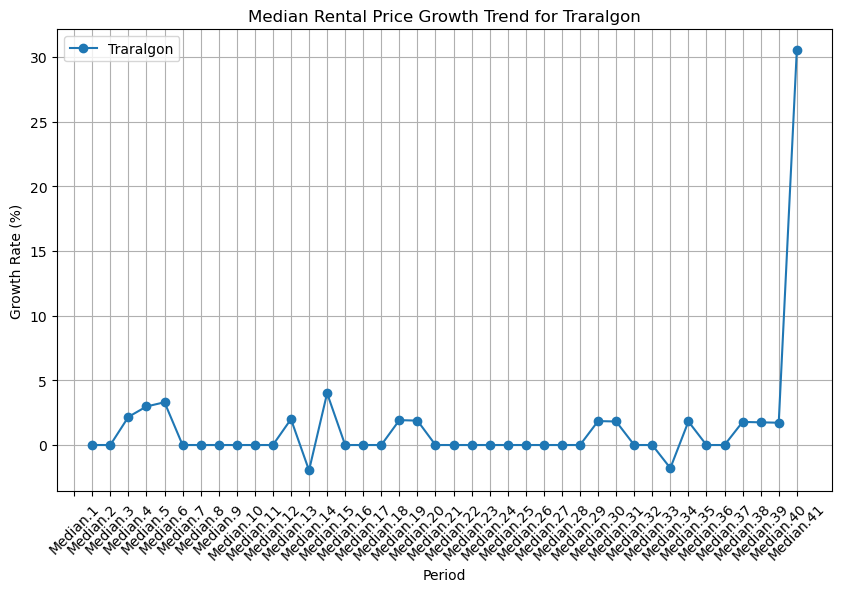

Growth trend for Wanagaratta:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
17      <NA>       2.5  2.439024       0.0       0.0  2.380952  2.325581   

    Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
17       0.0       0.0        0.0  ...        0.0        0.0   2.592593   

    Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
17   1.083032        0.0   3.571429        0.0        0.0  31.034483   

    Average Growth Rate (%)  
17                  1.71866  

[1 rows x 42 columns]


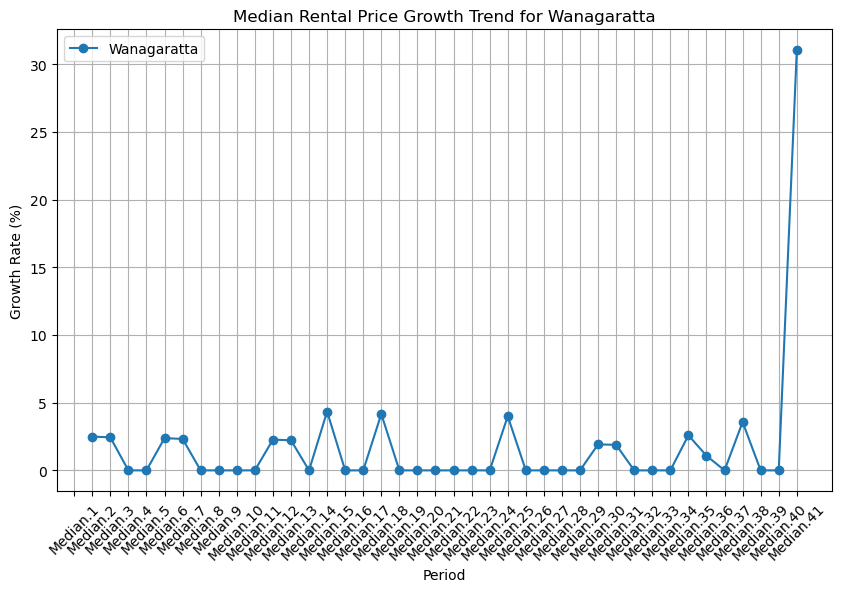

Growth trend for Warragul:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
18      <NA>       0.0  4.347826       0.0  4.166667       0.0       0.0   

    Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
18       0.0       3.6     0.3861  ...   3.225806        0.0     1.5625   

    Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
18   1.538462   3.030303   2.941176        0.0  -0.571429  26.436782   

    Average Growth Rate (%)  
18                 1.713139  

[1 rows x 42 columns]


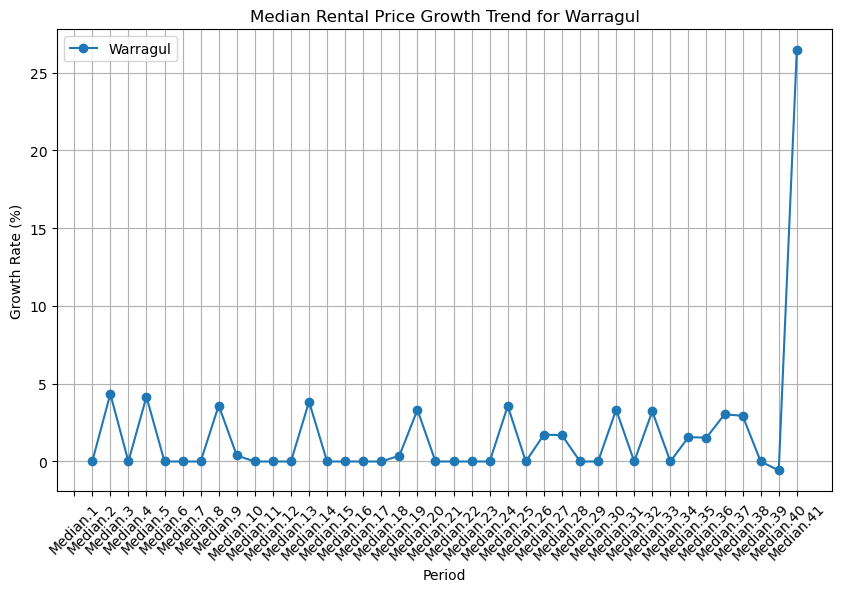

Growth trend for Warrnambool:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
19      <NA>       4.0  3.846154       0.0  3.703704       0.0       0.0   

    Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
19  1.785714       0.0        0.0  ...   3.448276        0.0        0.0   

    Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
19        0.0   3.333333   3.225806      3.125        0.0  27.272727   

    Average Growth Rate (%)  
19                   1.3897  

[1 rows x 42 columns]


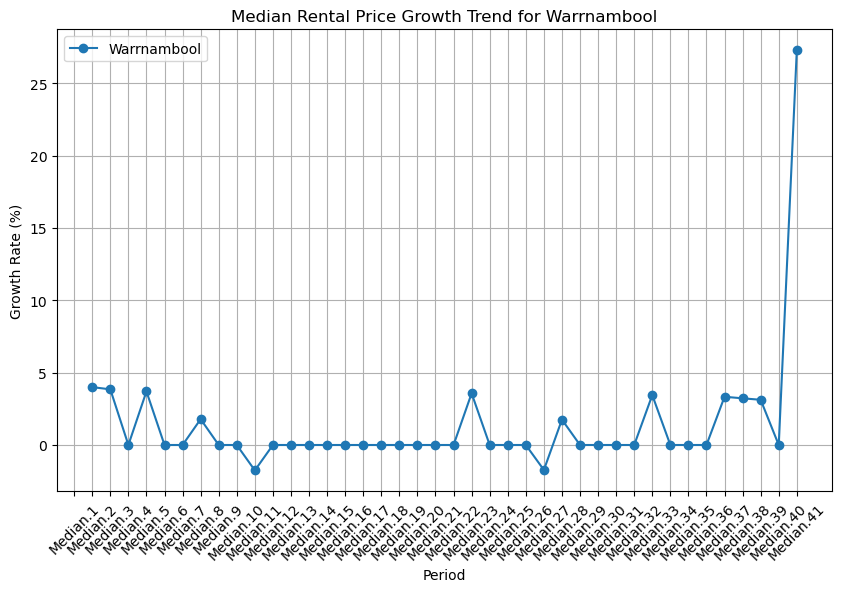

Growth trend for Wodonga:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
20      <NA>       0.0       0.0  2.083333  2.040816       0.0       0.0   

    Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
20       0.0       4.0        0.0  ...        0.0        0.0        0.0   

    Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
20   3.333333        0.0   3.225806        0.0     1.5625  26.153846   

    Average Growth Rate (%)  
20                 1.420747  

[1 rows x 42 columns]


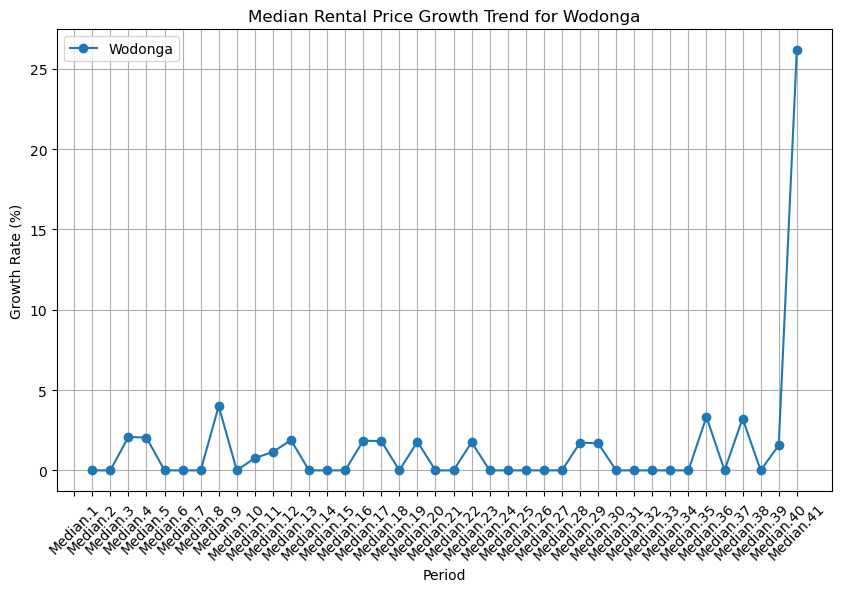

Growth trend for Group Total:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
21      <NA>       0.0       0.0  2.272727  2.222222       0.0  2.173913   

    Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
21   2.12766       0.0   4.166667  ...        0.0        0.0        0.0   

    Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
21   3.571429        0.0   3.448276        0.0        0.0       30.0   

    Average Growth Rate (%)  
21                  1.53559  

[1 rows x 42 columns]


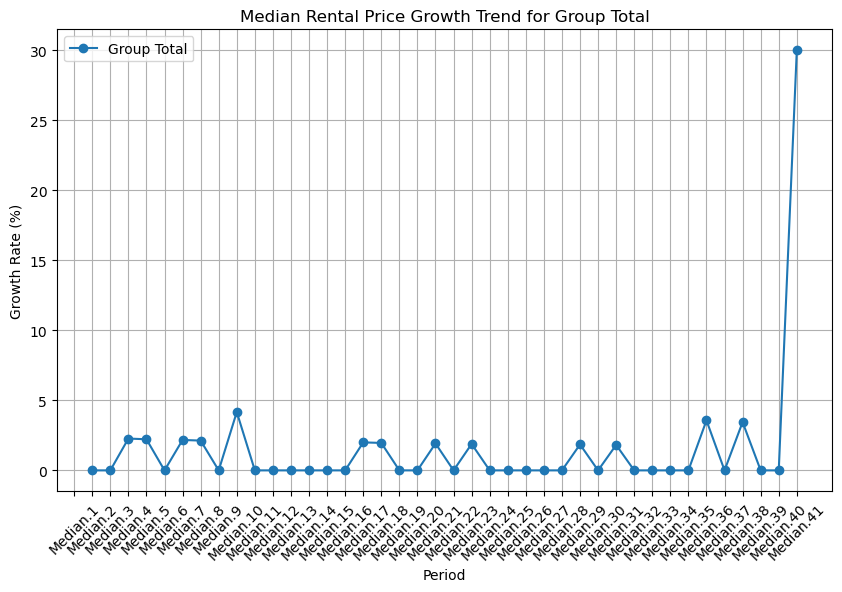

All suburbs growth trends:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
0       <NA>       0.0  4.545455  4.347826       0.0  2.083333  2.040816   
1       <NA>       0.0       0.0       0.0       0.0       0.0       2.5   
2       <NA>  4.444444   2.12766  4.166667       4.0       0.0  3.846154   
3       <NA>  2.272727  2.222222       0.0       0.0       0.0       0.0   
4       <NA>       0.0       5.0       0.0 -4.761905       6.5  3.286385   
5       <NA>  2.702703       0.0  2.631579       0.0  2.564103       0.0   
6       <NA>       0.0       2.5       0.0  2.439024       0.0  4.761905   
7       <NA>  6.666667       0.0     3.125  3.030303  5.882353       0.0   
8       <NA>  3.225806       0.0     3.125       0.0  3.030303  1.176471   
9       <NA>       0.0       0.0  3.333333  3.225806     3.125  1.515152   
10      <NA>       0.0       0.0       1.5  3.448276       0.0       0.0   
11      <NA>       0.0       0.0       0.0  2.272727  2.22222

In [16]:
import matplotlib.pyplot as plt
# Calculate the growth rate for each suburb separately and plot them
growth_trends = pd.DataFrame()

for suburb in median_data['Suburb'].unique():
    # Filter the data for the specific suburb
    suburb_data = median_data[median_data['Suburb'] == suburb].copy()

    # Calculate the percentage change in the median rental prices across the periods
    suburb_data_growth = suburb_data[median_columns].pct_change(axis='columns') * 100

    # Calculate cumulative growth or average growth as needed (here, taking the mean growth rate)
    suburb_data_growth['Average Growth Rate (%)'] = suburb_data_growth.mean(axis=1)

    # Append the results to the main DataFrame
    growth_trends = pd.concat([growth_trends, suburb_data_growth], ignore_index=True)

    # Print the growth trend for the suburb
    print(f"Growth trend for {suburb}:")
    print(suburb_data_growth)

    # Plotting the growth trend for the current suburb
    plt.figure(figsize=(10, 6))
    plt.plot(suburb_data_growth.columns[:-1], suburb_data_growth.iloc[0, :-1], marker='o', linestyle='-', label=suburb)
    plt.title(f'Median Rental Price Growth Trend for {suburb}')
    plt.xlabel('Period')
    plt.ylabel('Growth Rate (%)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Optional: Print all the growth trends for all suburbs
print("All suburbs growth trends:")
print(growth_trends)

In [17]:
print(growth_trends["Average Growth Rate (%)"])

0     1.620623
1     1.828887
2     1.715103
3     1.648072
4      1.33484
5     1.690866
6     1.513661
7      2.07778
8     1.978365
9     1.610568
10    1.748687
11    1.651708
12    2.025062
13    1.594583
14    1.243006
15    1.505638
16    1.394568
17     1.71866
18    1.713139
19      1.3897
20    1.420747
21     1.53559
Name: Average Growth Rate (%), dtype: Float64


In [18]:
print(median_data["Suburb"])

0                   Bairnsdale
1                      Benalla
2                  Castlemaine
3                       Echuca
4                     Hamilton
5                      Horsham
6                      Mildura
7               Moe-Newborough
8                      Morwell
9     Ocean Grove-Barwon Heads
10                    Portland
11                 Sale-Maffra
12                     Seymour
13                  Shepparton
14                   Swan Hill
15                     Torquay
16                   Traralgon
17                 Wanagaratta
18                    Warragul
19                 Warrnambool
20                     Wodonga
21                 Group Total
Name: Suburb, dtype: object
